In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Calculate KL divergence
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))


p = np.array([0.1, 0.1, 0.5, 0.4])
q = np.array([0.3, 0.2, 0.3, 0.5])

print(kl_divergence(p, q))
print(kl_divergence(q, p))


-0.013020555565494002
0.42653721123972954


- Not symmetric

In [60]:
def R(p,q, _lamda):
    return _lamda * p + (1 - _lamda) * q

In [61]:
_lamda = 0
print(R(p,q, _lamda))

array([0.3, 0.2, 0.3, 0.5])

In [71]:
# linspace from 0 to 1 not inclusive
lambdas = np.linspace(0, 1, 100)

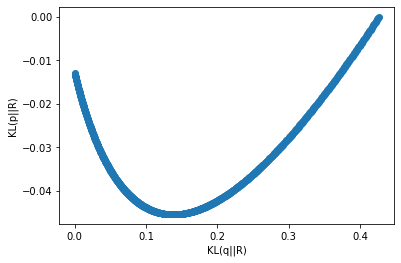

In [85]:
kl_divergence(p, R(p,q, _lamda))
bleh = []
for i in lambdas:
    bleh.append([kl_divergence(q, R(p,q, i)), kl_divergence(p, R(p,q, i))])

bleh = np.array(bleh)

plt.scatter(bleh[:,0], bleh[:,1])
plt.xlabel('KL(q||R)')
plt.ylabel('KL(p||R)')
plt.show()

In [86]:
# import e
import math

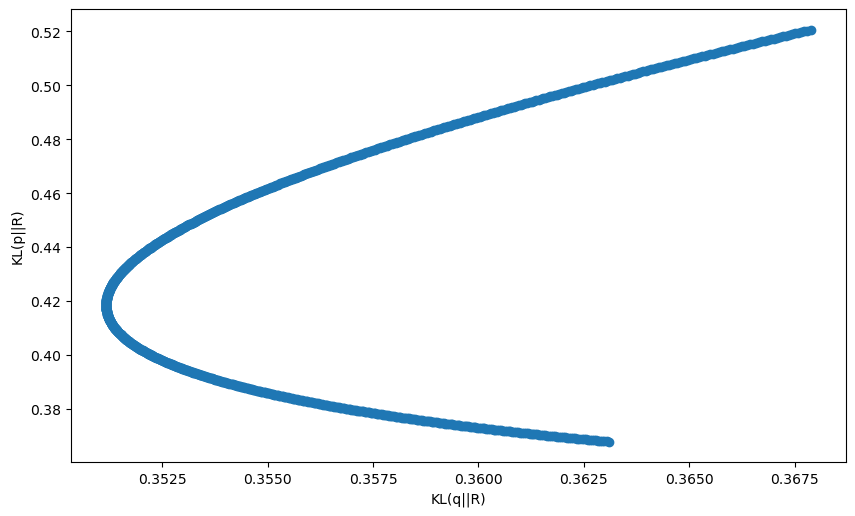

In [88]:
for i in range(len(lambdas)):
    bleh[i][0] = math.exp(-bleh[i][0])
    bleh[i][1] = math.exp(-bleh[i][1])

plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(bleh[:,1], bleh[:,0])
plt.xlabel('KL(q||R)')
plt.ylabel('KL(p||R)')
plt.show()


----

# Clusters

In [157]:
!pip install faiss-cpu

     |████████████████████████████████| 5.6 MB 175 kB/s eta 0:00:01


In [158]:
import faiss

In [153]:
# read npy
after_pca = np.load('after_pca.npy')
print(after_pca.shape)

(200, 82)


In [160]:
kmeans = faiss.Kmeans(after_pca.shape[1], 10, niter=20, verbose=True)
kmeans.train(after_pca)

D, I = kmeans.index.search(after_pca, 1) # ``
print(D.shape)
print(I.shape)

# read npy


WARNING clustering 200 points to 10 centroids: please provide at least 390 training points


Clustering 200 points in 82D to 10 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.01 s
  Iteration 19 (0.20 s, search 0.19 s): objective=43.0788 imbalance=1.325 nsplit=0       


43.078826904296875

: 

In [2]:
import numpy as np
np.vstack(([1,2,3], [4,5,6]))

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
for 

# Misc

0.7856557640658679


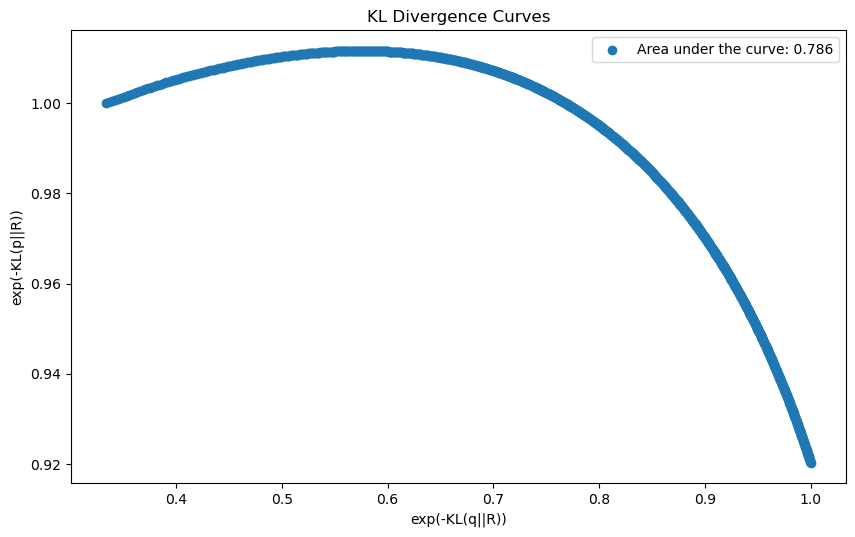

In [136]:
# Modularize the code

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

def R(p,q, _lamda):
    return _lamda * p + (1 - _lamda) * q

def plot_divergence_curves(p, q, constant=1):
    lambdas = np.linspace(0, 1, 1000)

    r_values = []

    for l in lambdas:
        r_values.append(R(p,q, l))
    
    kl_q_r = []
    kl_p_r = []

    for r in r_values:
        kl_q_r.append(kl_divergence(q, r))
        kl_p_r.append(kl_divergence(p, r))
    
    
    kl_q_r = np.array(kl_q_r)
    kl_p_r = np.array(kl_p_r)



    kl_q_r = np.exp(-kl_q_r * constant)
    kl_p_r = np.exp(-kl_p_r * constant)
    
    area = np.trapz(kl_q_r)/np.trapz(kl_p_r)
    print(area)

    plt.figure(figsize=(10, 6), dpi=100)
    plt.scatter(kl_q_r, kl_p_r)
    plt.title('KL Divergence Curves')
    plt.legend([f'Area under the curve: {np.round(area,3)}'])
    plt.xlabel('exp(-KL(q||R))')
    plt.ylabel('exp(-KL(p||R))')
    plt.show()




p = np.array([0.01, 0.1, 0.5, 0.4, 0.9, 1])
q = np.array([0.3, 0.2, 0.3, 0.5, 0.88, 1])

plot_divergence_curves(p, q, constant=1)


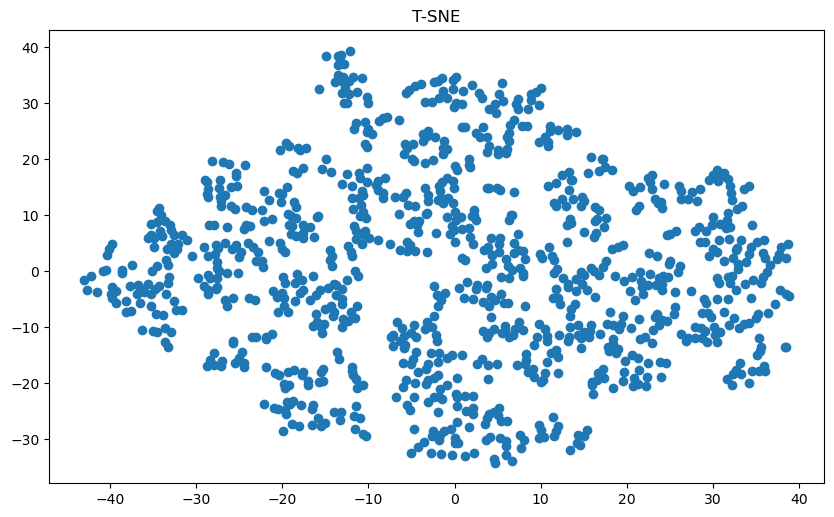

In [145]:
# import norm
from scipy.stats import norm
# Generate data from a gausian distribution in 4D
data = norm.rvs(size=(1000, 4))

# T-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(data)

plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(tsne_obj[:,0], tsne_obj[:,1])
plt.title('T-SNE')
plt.show()


In [3]:
# k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(tsne_obj)

plt.figure(figsize=(10, 6), dpi=100)
# display the cluster numbers in the plot next to the points
for i in range(10):
    plt.scatter(tsne_obj[kmeans.labels_==i,0], tsne_obj[kmeans.labels_==i,1], label=f'Cluster {i}')
# plt.scatter(tsne_obj[:,0], tsne_obj[:,1], c=kmeans.labels_, cmap='tab10')
plt.title('T-SNE before k-means clustering')
plt.show()


NameError: name 'tsne_obj' is not defined

In [4]:
# k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(data)

# T-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(data)

plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(tsne_obj[:,0], tsne_obj[:,1], c=kmeans.labels_)
plt.title('T-SNE after k-means clustering')
plt.show()


NameError: name 'data' is not defined

In [6]:
import numpy as np

P = [0.22, 0.57, 0.12, 0.69]
Q = [0.31, 0.42, 0.12]

# Coverting to numpy array
P = np.array(P)
Q = np.array(Q)


# Make dimensions equal
if len(P) > len(Q):
    Q = np.append(Q, np.zeros(len(P) - len(Q)))
elif len(P) < len(Q):
    P = np.append(P, np.zeros(len(Q) - len(P)))

lam = 0.001

R = lam * P + (1 - lam) * Q

# Round off the values
R = np.round(R, 4)

R



array([0.3099, 0.4202, 0.12  , 0.0007])